In [83]:
# magick mogrify -format jpg *.svg
# magick convert *.svg out.gif

In [1]:
from pyMCDS import pyMCDS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mcds = pyMCDS('output00000046.xml', 'C:\\Users\Yushang\Desktop\master\output')

In [3]:
# print(mcds.get_time())
print(mcds.get_cell_variables())
print(mcds.get_substrate_names())

['ID', 'position_x', 'position_y', 'position_z', 'total_volume', 'cell_type', 'cycle_model', 'current_phase', 'elapsed_time_in_phase', 'nuclear_volume', 'cytoplasmic_volume', 'fluid_fraction', 'calcified_fraction', 'orientation_x', 'orientation_y', 'orientation_z', 'polarity', 'migration_speed', 'motility_vector_x', 'motility_vector_y', 'motility_vector_z', 'migration_bias', 'motility_bias_direction_x', 'motility_bias_direction_y', 'motility_bias_direction_z', 'persistence_time', 'motility_reserved', 'pressure', 'volume', 'transrate']
['oxygen', 'factorC']


In [4]:
mcds.data.keys()

dict_keys(['metadata', 'mesh', 'continuum_variables', 'discrete_cells'])

In [5]:
print(mcds.data['metadata'])

{'current_time': 8280.0, 'time_units': 'min', 'current_runtime': 269.479522, 'runtime_units': 'sec', 'spatial_units': 'micron'}


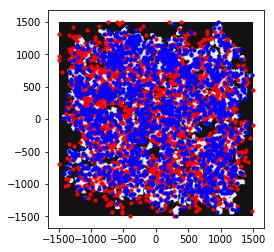

In [6]:
n = 46
filename='output'+"%08i"%n+'.xml'
mcds=pyMCDS(filename,'C:\\Users\Yushang\Desktop\master\output')
t = mcds.get_time()
cell_type=mcds.data['discrete_cells']['cell_type']
cell_type=cell_type.astype(int)
ind0 = np.argwhere(cell_type==1).flatten();
ind1 = np.argwhere(cell_type==2).flatten();
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
plt.clf()
plt.scatter(cx[ind0],cy[ind0],c='r',s=10)
plt.scatter(cx[ind1],cy[ind1],c='b',s=10)
plt.axis('image');
mcds.get_substrate_names();
cs = mcds.get_concentrations( 'factorC' );
X,Y = mcds.get_2D_mesh();
plt.clf()
plt.contourf(X,Y,cs[:,:,0],cmap='gray');
plt.scatter(cx[ind0],cy[ind0],c='r',s=10)
plt.scatter(cx[ind1],cy[ind1],c='b',s=10)
plt.axis('image');

Text(0,0.5,'y(micron)')

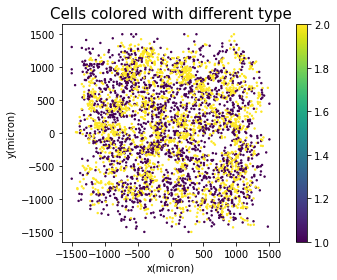

In [7]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
op = mcds.data['discrete_cells']['cell_type']
plt.scatter(cx,cy,c=op,s=2)
plt.axis('image')
plt.colorbar()
plt.title( 'Cells colored with different type' , size=15)
plt.xlabel( 'x(micron)' , size=10 )
plt.ylabel( 'y(micron)', size=10 )

Text(0.5,1,'Live cells colored by type at t=138.0 hr')

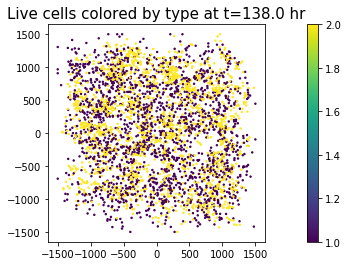

In [8]:
cycle = mcds.data['discrete_cells']['cycle_model']
cycle = cycle.astype( int ) 
live = np.argwhere( cycle < 100 ).flatten()
dead = np.argwhere( cycle >= 100 ).flatten()
n_live = len( live )
n_dead = len( dead )
plt.clf()
plt.scatter( cx[live],cy[live],c=op[live],s=2);
plt.colorbar()
plt.axis('image')
t=mcds.get_time()
plt.title( 'Live cells colored by type at t=' +str(t/60) + ' hr', size=15)

In [91]:
# mcds.get_substrate_names();
# factorc = mcds.get_concentrations( 'factorC' );
# X,Y = mcds.get_2D_mesh();
# plt.clf()
# plt.contourf(X,Y,factorc[:,:,0]);
# plt.scatter( cx[live],cy[live],c=factorc[live],s=2);
# plt.colorbar()
# plt.axis('image')
# plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr', size=30)

In [10]:
last_index = 56;
live_count = np.zeros( last_index+1 );
dead_count = np.zeros( last_index+1 );
mean_p = np.zeros( last_index+1 );
times = np.zeros( last_index+1 );
for n in range( 0,last_index+1 ):
    filename='output'+"%08i"%n+'.xml'
    mcds=pyMCDS(filename,'C:\\Users\Yushang\Desktop\master\output')
    times[n]= mcds.get_time()
    cycle=mcds.data['discrete_cells']['cycle_model']
    p = mcds.get_concentrations( 'factorC' )
    live = np.argwhere(cycle<100).flatten()
    dead = np.argwhere(cycle>=100).flatten()
    live_count[n] = len(live)
    dead_count[n] = len(dead)
    mean_p[n] = np.sum(p)/150/150

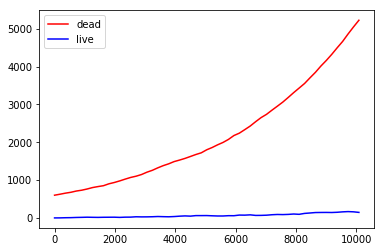

In [12]:
plt.clf()
plt.plot( times, live_count , 'r-' )
plt.plot( times, dead_count , 'b-' );
plt.legend( {'live', 'dead' } )

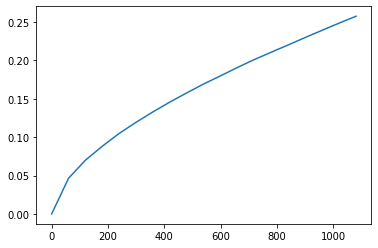

In [95]:
poly=np.polyfit( times,np.log(live_count),1) 
plt.plot(times,mean_p)

In [ ]:
x_lst = np.linspace(0,20)
thershold = 0.8
y_lst = (1-x_lst)/thershold

In [1]:
from pyMCDS import pyMCDS
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Live cells colored by p at t=7.0 hr')

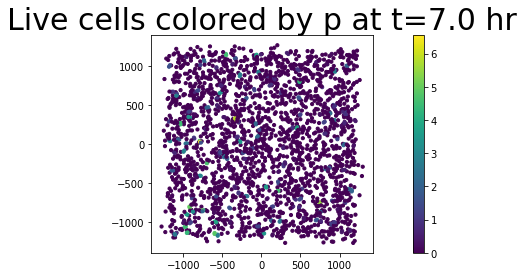

In [3]:
mcds= pyMCDS('output00000007.xml', 'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output')
t=mcds.get_time()
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
op = mcds.data['discrete_cells']['pressure']
cycle=mcds.data['discrete_cells']['cycle_model']
cycle=cycle.astype(int )
live = np.argwhere( cycle < 100 ).flatten()
dead = np.argwhere( cycle >= 100 ).flatten()
n_live= len( live )
n_dead=len( dead)
np.mean(op[live] )
plt.clf()
plt.scatter( cx[live],cy[live],c=op[live],s=10);
plt.colorbar()
plt.axis('image')
plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr', size=30)


(array([2.033e+03, 9.000e+01, 3.800e+01, 3.600e+01, 1.800e+01, 2.100e+01,
        1.100e+01, 9.000e+00, 4.000e+00, 1.000e+00]),
 array([0.        , 0.65461819, 1.30923639, 1.96385458, 2.61847277,
        3.27309097, 3.92770916, 4.58232736, 5.23694555, 5.89156374,
        6.54618194]),
 <a list of 10 Patch objects>)

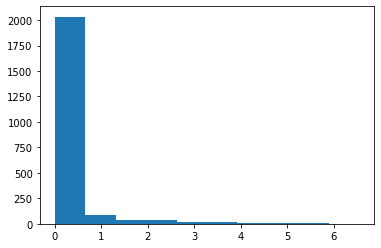

In [4]:
plt.hist( op )

In [ ]:
plt.scatter(cx,cy,c=op,s=200)
plt.axis( 'image' )
plt.clf()
plt.hist( op )
plt.title( 'Cells Pressure',size=30)
plt.xlabel( 'x' , size=20 )
plt.ylabel('y',size=20)
plt.title('oncoprotein att=' + str(t/60) + ' hours' , size=30)

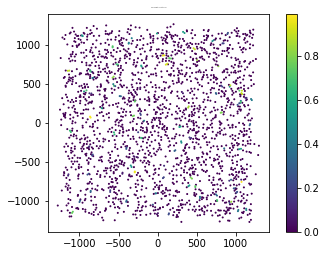

In [8]:
ind=np.argwhere( (cycle<100) & (op<1) ) .flatten()
plt.clf()
plt.scatter( cx[ind], cy[ind], c=op[ind], s=1 )
plt.title( 'Live cells with p>1 at t='\
+str(t/60) + 'hr', size=1)
plt.axis('image')
plt.colorbar()